In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/kaggle/input/nf-unsw-nb15-v2csv/NF-UNSW-NB15-v2.csv')  
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,59.166.0.5,1305,149.171.126.8,21,6,1.0,9,1,193,3,...,0,7240,0,0,0,0,0,331.0,0,Benign
1,59.166.0.5,1305,149.171.126.8,21,6,1.0,261,5,469,7,...,8688,8688,18944,74,0,0,0,230.0,0,Benign
2,59.166.0.5,1305,149.171.126.8,21,6,1.0,481,9,750,11,...,10136,10136,33792,132,0,0,0,229.0,0,Benign
3,59.166.0.5,1305,149.171.126.8,21,6,1.0,701,13,1054,15,...,11584,11584,48640,190,0,0,0,125.0,0,Benign
4,59.166.0.5,1305,149.171.126.8,21,6,1.0,1031,19,1474,21,...,14480,13032,64256,251,0,0,0,230.0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390270,59.166.0.4,58663,149.171.126.1,5190,6,0.0,1064,12,2364,14,...,10136,10136,29696,116,0,0,0,0.0,0,Benign
2390271,59.166.0.6,60977,149.171.126.4,53,17,0.0,146,2,178,2,...,0,0,0,0,19348,1,60,0.0,0,Benign
2390272,59.166.0.6,54553,149.171.126.9,80,6,7.0,994,10,8896,10,...,10136,7240,7424,29,0,0,0,0.0,0,Benign
2390273,59.166.0.6,55026,149.171.126.5,8248,6,0.0,4014,68,60268,70,...,44888,14480,8960,35,0,0,0,0.0,0,Benign


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390275 entries, 0 to 2390274
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int64  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int64  
 4   PROTOCOL                     int64  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int64  
 11  CLIENT_TCP_FLAGS             int64  
 12  SERVER_TCP_FLAGS             int64  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      int64  
 17  MAX_TTL                      int64  
 18  LONGEST_FLOW_PKT             int64  
 19  

In [8]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Missing Values Per Column:
IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_

In [9]:
print("Unique Values in 'Attack':", df['Attack'].unique())

Unique Values in 'Attack': ['Benign' 'Exploits' 'Generic' 'Fuzzers' 'Backdoor' 'DoS' 'Reconnaissance'
 'Shellcode' 'Worms' 'Analysis']


In [10]:
print("\nLabel Value Counts:")
print(df['Label'].value_counts())


Label Value Counts:
Label
0    2295222
1      95053
Name: count, dtype: int64


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, graphWidth):
   
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])

    # Calculate correlation matrix
    corr = df.corr()

    # Plot correlation matrix with annotations
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

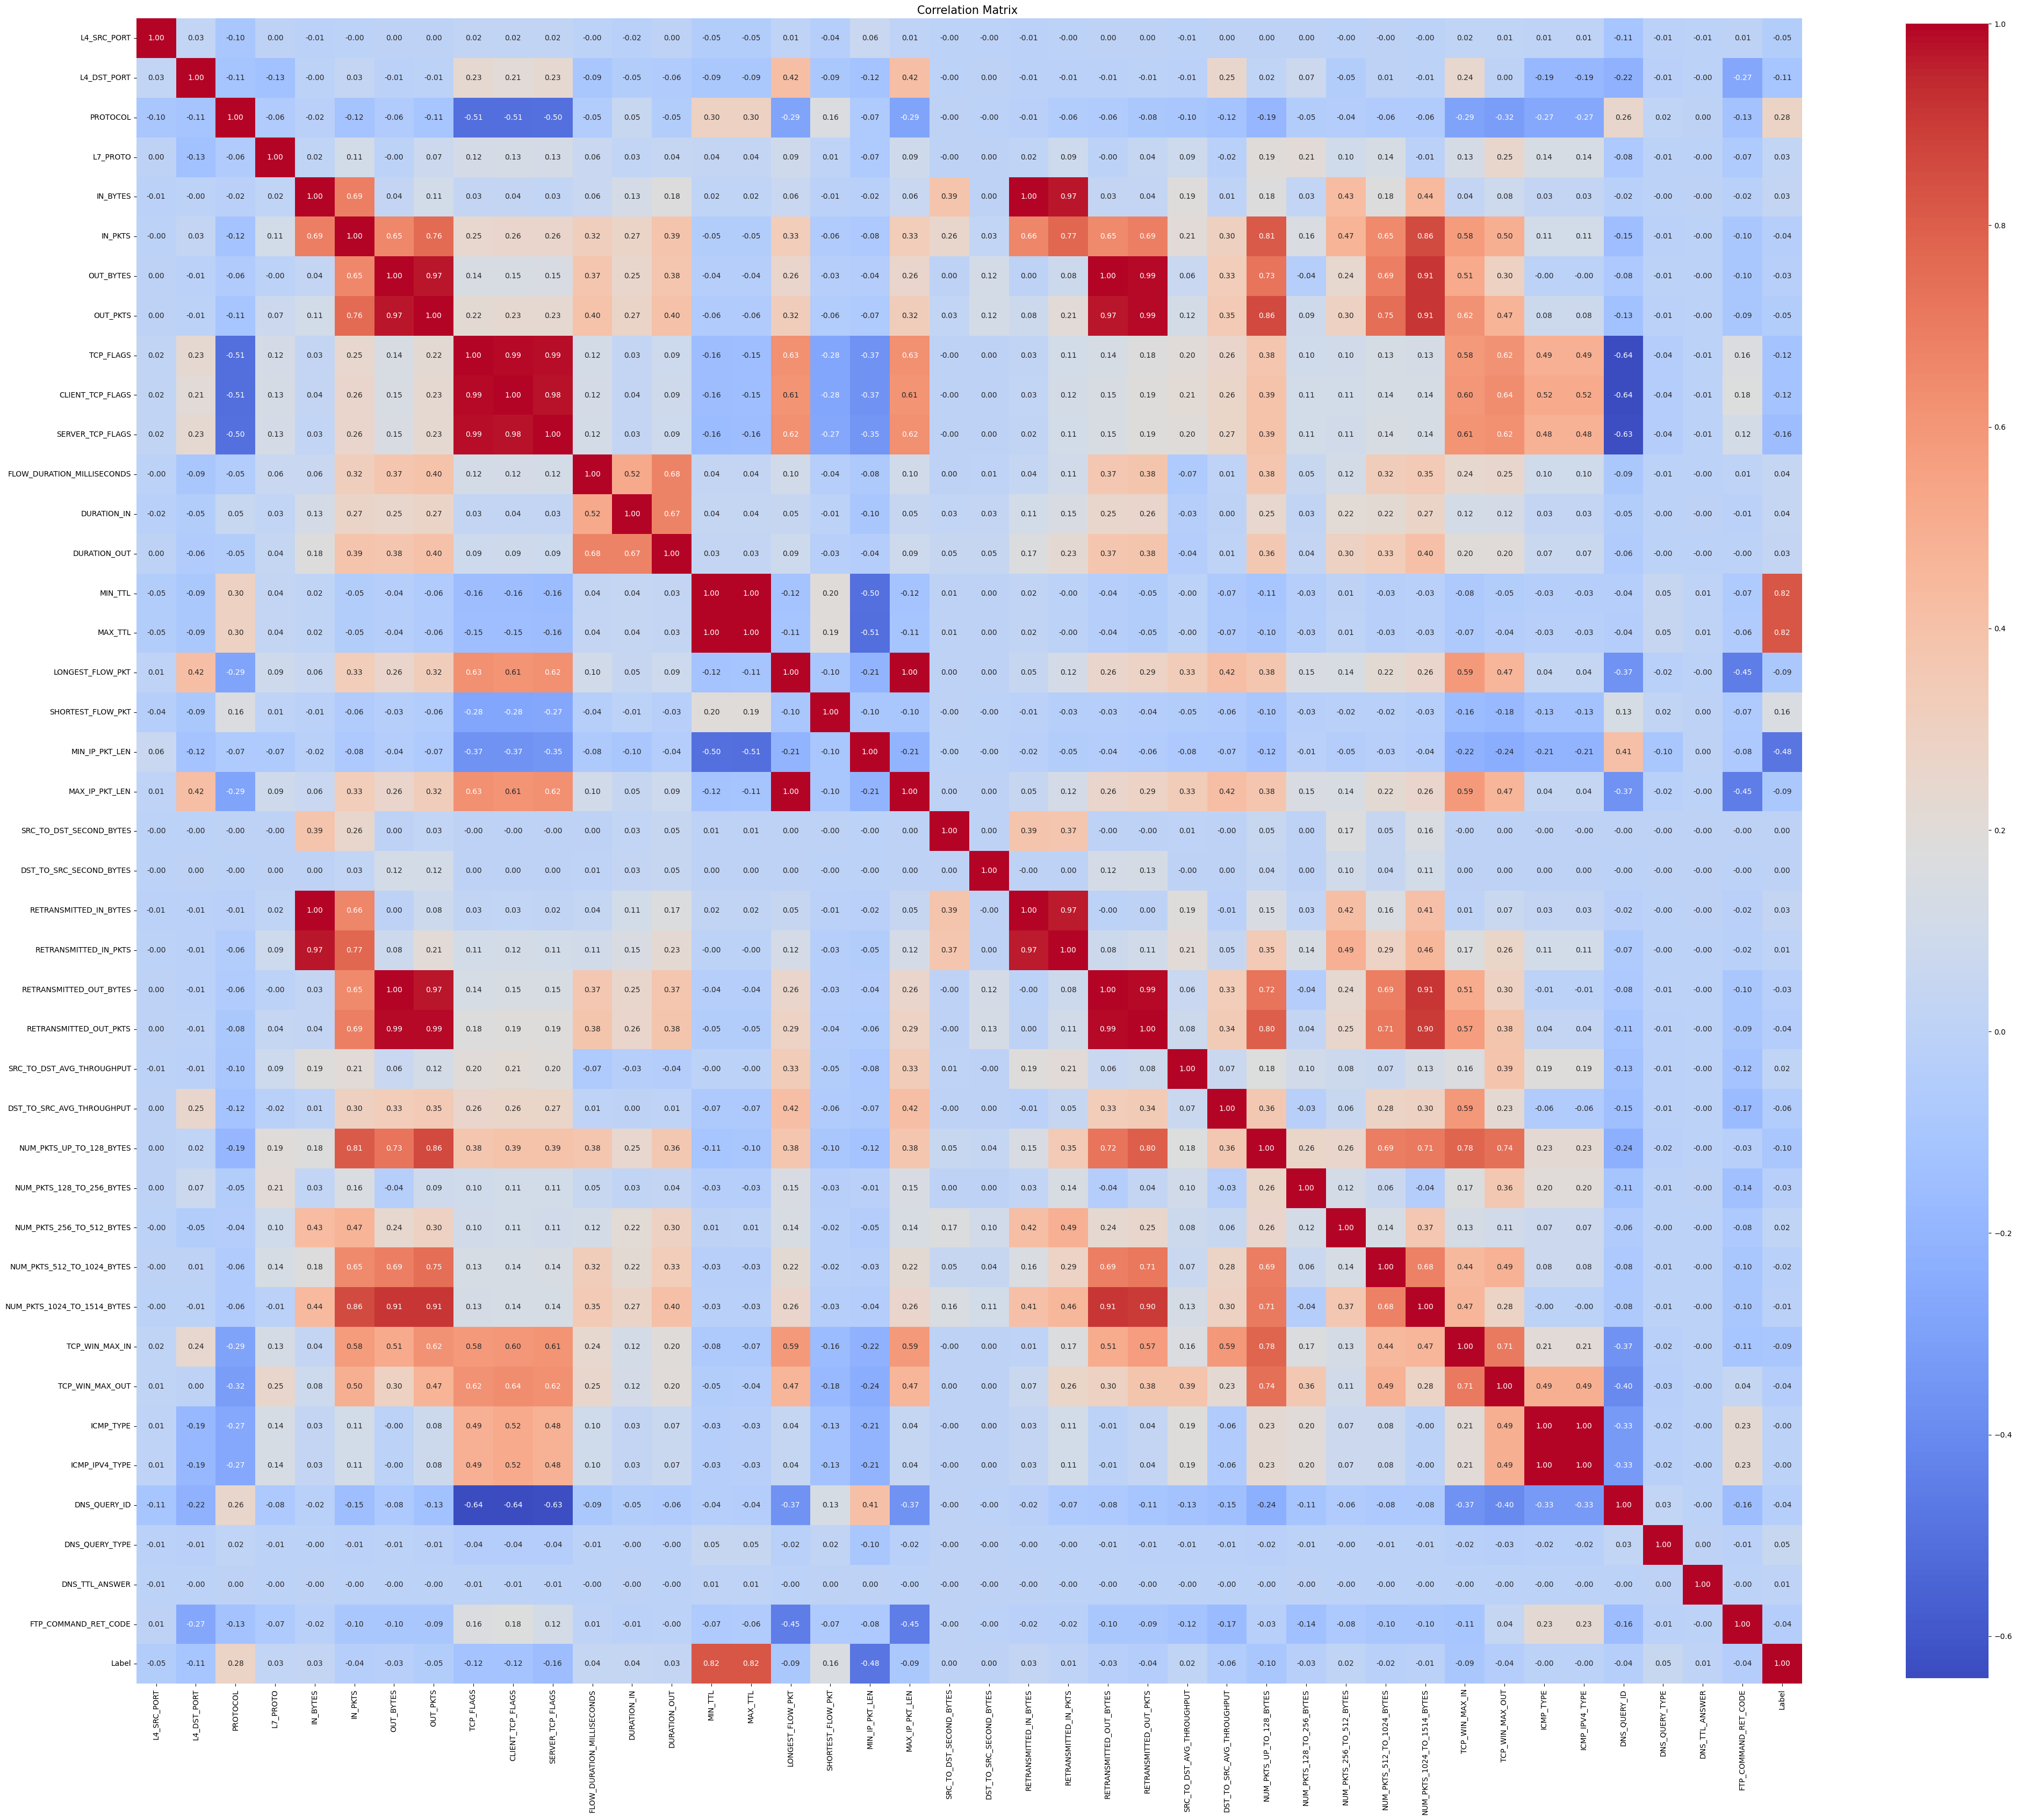

In [12]:
plotCorrelationMatrix(df, 50)

In [13]:
import numpy as np
import pandas as pd

def drop_high_correlation_features(data, correlation_threshold=0.9, target_feature='Label'):
    
    # Preserve the target feature if it exists in the dataset
    if target_feature in data.columns:
        target_column = data[target_feature]
    else:
        target_column = None

    # Select only numerical features for correlation analysis
    numeric_features = data.select_dtypes(include=[np.number])

    # Calculate the correlation matrix for the numeric features
    feature_correlation_matrix = numeric_features.corr().abs()  # Use absolute correlation values

    # Extract the upper triangle of the correlation matrix to avoid redundancy
    upper_triangle_matrix = feature_correlation_matrix.where(
        np.triu(np.ones(feature_correlation_matrix.shape), k=1).astype(bool)
    )

    # Identify features to drop based on the correlation threshold
    features_to_remove = [
        feature for feature in upper_triangle_matrix.columns 
        if any(upper_triangle_matrix[feature] > correlation_threshold)
    ]

    # Drop the identified features from the dataset
    df_new = numeric_features.drop(columns=features_to_remove)
    df_new = df_new.drop(columns=['Attack'], errors='ignore')


    # Collect the dropped features for further analysis or debugging
    removed_features_data = numeric_features[features_to_remove]

    # Reintegrate the target feature back into the reduced dataset if it was removed
    if target_column is not None:
        df_new[target_feature] = target_column

    # Display summary of dropped features
    print(f"Total features removed due to high correlation: {len(features_to_remove)}")
    print("Removed features:", features_to_remove)

    return df_new, removed_features_data

df_new, removed_features = drop_high_correlation_features(data=df)

Total features removed due to high correlation: 11
Removed features: ['OUT_PKTS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS', 'NUM_PKTS_1024_TO_1514_BYTES', 'ICMP_IPV4_TYPE']


In [14]:
df_new

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,...,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
0,1305,21,6,1.0,9,1,193,24,0,0,...,0,0,0,7240,0,0,0,0,331.0,0
1,1305,21,6,1.0,261,5,469,24,0,0,...,0,0,8688,8688,18944,0,0,0,230.0,0
2,1305,21,6,1.0,481,9,750,24,0,0,...,0,0,10136,10136,33792,0,0,0,229.0,0
3,1305,21,6,1.0,701,13,1054,24,0,0,...,0,0,11584,11584,48640,0,0,0,125.0,0
4,1305,21,6,1.0,1031,19,1474,24,0,0,...,0,0,14480,13032,64256,0,0,0,230.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390270,58663,5190,6,0.0,1064,12,2364,27,0,0,...,0,2,10136,10136,29696,0,0,0,0.0,0
2390271,60977,53,17,0.0,146,2,178,0,0,0,...,0,0,0,0,0,19348,1,60,0.0,0
2390272,54553,80,6,7.0,994,10,8896,26,0,0,...,2,0,10136,7240,7424,0,0,0,0.0,0
2390273,55026,8248,6,0.0,4014,68,60268,27,0,0,...,0,0,44888,14480,8960,0,0,0,0.0,0


In [15]:
X = df_new.drop(columns=['Label'])
y = df_new['Label']

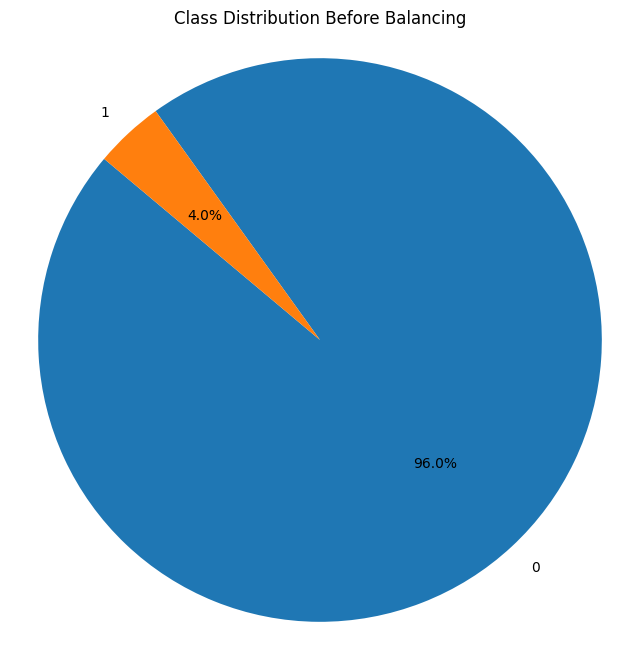

In [16]:
# Pie chart before balancing
def plot_pie_chart(y, title):
    class_counts = y.value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

plot_pie_chart(y, 'Class Distribution Before Balancing')

In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Perform undersampling to balance the dataset
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_res, Y_res = rus.fit_resample(X, y)

# Check the class distribution after undersampling
from collections import Counter
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(Y_res))

Original class distribution: Counter({0: 2295222, 1: 95053})
Resampled class distribution: Counter({0: 95053, 1: 95053})


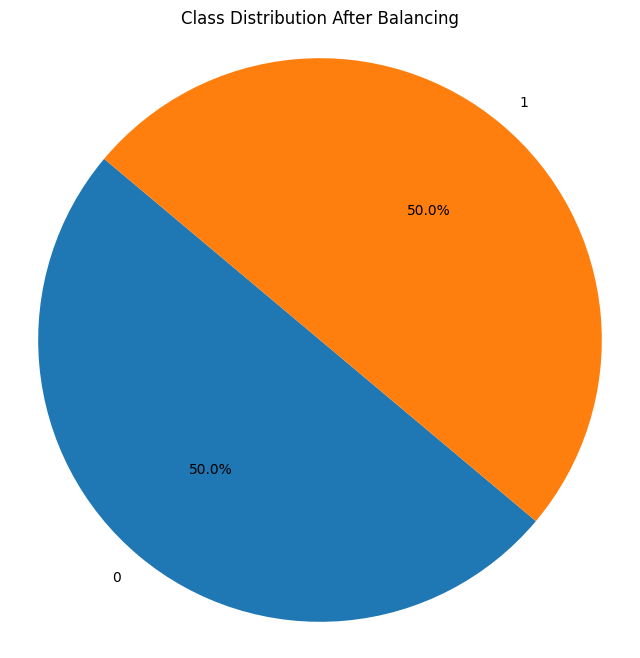

In [19]:
#Pie chart after balancing
plot_pie_chart(Y_res, 'Class Distribution After Balancing')

In [20]:
df_new_resampled = pd.DataFrame(x_res, columns=X.columns)  # Create a new DataFrame for X_res
df_new_resampled['Label'] = Y_res  # Add the resampled 'Label' column

# Check the class distribution in the updated df_new_resampled
print(df_new_resampled['Label'].value_counts())

Label
0    95053
1    95053
Name: count, dtype: int64


In [21]:
df_new_resampled

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,...,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
221068,58192,80,6,7.0,1580,12,10168,27,0,0,...,6,0,11584,8688,16896,0,0,0,0.0,0
807498,22013,1292,6,0.0,4862,84,79236,27,0,0,...,0,6,56472,14480,11008,0,0,0,0.0,0
1115182,8175,5190,6,0.0,1036,12,2262,27,0,0,...,0,2,10136,10136,26112,0,0,0,0.0,0
2209647,7935,4424,6,0.0,2974,48,33882,27,0,0,...,0,0,30408,14480,8960,0,0,0,0.0,0
1385887,39777,8792,6,0.0,4472,18,2456,27,0,0,...,2,0,14480,14480,7168,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387785,0,0,2,0.0,80,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2387786,0,0,2,0.0,80,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2387787,0,0,2,0.0,80,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2387788,0,0,2,0.0,80,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1


In [35]:
df_new_resampled.shape

(190106, 31)

In [36]:
duplicate_count = df_new_resampled.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")

Number of Duplicate Rows: 24439


In [37]:
df_new_resampled = df_new_resampled.drop_duplicates()

In [41]:
df_new_resampled.shape

(165667, 31)

In [43]:
print(df_new_resampled.duplicated().sum())

0


In [44]:
df_new_resampled.to_csv("processedData.csv", index=False)